In [1]:
import sys

WORKING_DIR = "/home/daniel/Documents/Uni/practical-sose23/"
HOME_DIR = "/home/daniel/"

sys.path.append(WORKING_DIR + "castellvi/3D-Castellvi-Prediction/src/utils")
from _prepare_data import *

from BIDS import BIDS_FILE, Centroids, Image_Reference, Centroid_Reference, NII
from BIDS.snapshot2D.snapshot_modular import Snapshot_Frame,create_snapshot, Visualization_Type
from pathlib import Path

WORKING_DIR = "/home/daniel/Documents/Uni/practical-sose23/"
dataset = [WORKING_DIR  + 'dataset-verse19',  WORKING_DIR + 'dataset-verse20']
data_types = ['rawdata',"derivatives"]
image_types = ["ct", "subreg", "cortex"]
master_list = WORKING_DIR + 'castellvi/3D-Castellvi-Prediction/src/dataset/VerSe_masterlist.xlsx'
processor = DataHandler(master_list=master_list ,dataset=dataset, data_types=data_types, image_types=image_types)
processor._drop_missing_entries()

####################################
/home/daniel/anaconda3/envs/castellvi/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  File "/home/daniel/anaconda3/envs/castellvi/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/daniel/anaconda3/envs/castellvi/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/daniel/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/daniel/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
    app.start()
  File "/home/daniel/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
    self.io_loop.start()
  File "/home/daniel/.

[!] Unknown format seg-ano in file sub-verse602_dir-iso_seg-ano.nii.gz
[!] Unknown format iso-ctd in file sub-verse616_dir-iso_iso-ctd.json
[!] Unknown format subreg in file sub-verse559_CT-sag_seg-ano_subreg.nii.gz
Number of missing subjects: 40
Number of missing sacrum_seg: 40
All missing subjects has no information about sacrum segmentation


In [8]:
bids_subjects, master_subjects = processor._get_subject_samples()
bids_families = [processor._get_subject_family(subject) for subject in bids_subjects]
i = 0
for family in bids_families:
    if i > 9: 
        break
    seg_nii = processor._get_cutout(family = family, return_seg = True, max_shape = (128,86,136))
    ct_nii = processor._get_cutout(family = family, return_seg = False, max_shape = (128,86,136))
    seg_nii.save( HOME_DIR + "tmp/seg_{}.nii.gz".format(i))
    ct_nii.save( HOME_DIR + "tmp/ct_{}.nii.gz".format(i))
    print(ct_nii.shape, seg_nii.shape)
    i = i + 1


Number of missing subjects: 0
Number of missing sacrum_seg: 0
All missing subjects has no information about sacrum segmentation
Total families in the dataset: 342
Subjects with multiple families: ['verse400', 'verse401', 'verse402', 'verse403', 'verse404', 'verse405', 'verse406', 'verse407', 'verse408', 'verse409', 'verse410', 'verse411', 'verse412', 'verse413', 'verse414', 'verse415', 'verse416', 'verse417']
[*] Save /home/daniel/tmp/seg_0.nii.gz as uint8
[*] Save /home/daniel/tmp/ct_0.nii.gz as float32
(128, 86, 136) (128, 86, 136)
[*] Save /home/daniel/tmp/seg_1.nii.gz as uint8
[*] Save /home/daniel/tmp/ct_1.nii.gz as int16
(128, 86, 136) (128, 86, 136)
[*] Save /home/daniel/tmp/seg_2.nii.gz as uint8
[*] Save /home/daniel/tmp/ct_2.nii.gz as float32
(128, 86, 136) (128, 86, 136)
[*] Save /home/daniel/tmp/seg_3.nii.gz as uint8
[*] Save /home/daniel/tmp/ct_3.nii.gz as float32
(128, 86, 136) (128, 86, 136)
[*] Save /home/daniel/tmp/seg_4.nii.gz as uint8
[*] Save /home/daniel/tmp/ct_4.ni

[*] Snapshot saved: /home/daniel/tmp/snap.jpg


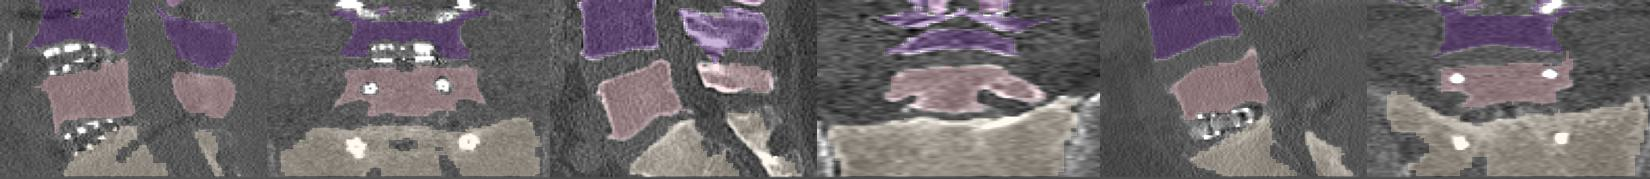

In [10]:
from IPython.display import Image
out_file = Path(HOME_DIR + 'tmp/snap.jpg')
ct_niis = [HOME_DIR + "tmp/ct_{}.nii.gz".format(i) for i in range(9)]
seg_niis = [HOME_DIR + "tmp/seg_{}.nii.gz".format(i) for i in range(9)]
ct_frames = [Snapshot_Frame(image = ct_niis[i],segmentation=seg_niis[i],sagittal = True, coronal = True) for i in range(3)]
create_snapshot(out_file,ct_frames)

Image(filename=out_file) 